In [1]:
from numpy import *
import operator

def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

def classify0(inx, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    #输入数据到dataSet的距离
    diffMat = tile(inx, (dataSetSize,1)) - dataSet
    #欧氏距离
    sqDiffMat = diffMat**2
    #按行方向相加
    sqDistances = sqDiffMat.sum(axis=1)
    didtances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    #欧式距离开根号，然后排序
    sortedDistIndicies = distances.argsort()
    #创建一个字典
    classCount ={}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(),key = operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

In [2]:
group,labels = createDataSet()
dataSetSize = group.shape[0]
diffMat = tile([1,1], (dataSetSize,1)) - group
diffMat = diffMat**2
print(diffMat)
distance = diffMat.sum(axis = 1)
#distance = distance**0.5
sortedDist = distance.argsort()
classCount = {}
print(distance)
print(sortedDist)
for i in range(4):
    voteIlabel = labels[sortedDist[i]]
    classCount[voteIlabel] = classCount.get(voteIlabel,0)+1
    print(voteIlabel)
    print(classCount)
#x = classify0([1,1],group,labels,2)


[[0.   0.01]
 [0.   0.  ]
 [1.   1.  ]
 [1.   0.81]]
[0.01 0.   2.   1.81]
[1 0 3 2]
A
{'A': 1}
A
{'A': 2}
B
{'A': 2, 'B': 1}
B
{'A': 2, 'B': 2}


In [3]:
def file2feature(filename):
    fr = open(filename)
    frLines = fr.readlines()
    numberOfLines = len(frLines)
    retFeature = zeros((numberOfLines,3))
    classLabelVector = []
    index = 0
    for line in frLines:
        #去除首尾空格
        line = line.strip()
        listLine = line.split('\t')
        retFeature[index,:] = listLine[0:3]
        labels = {'didntLike':1,'smallDoses':2,'largeDoses':3}
        classLabelVector.append(labels[listLine[-1]])
        index+=1
    return retFeature,classLabelVector

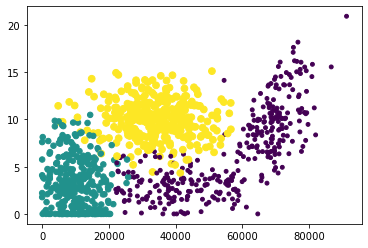

In [4]:
import matplotlib
import matplotlib.pyplot as plt
dataFeature,dataLabels = file2feature("D:\\myOwnData\\MachineLearningInAction\\datingTestSet.txt")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataFeature[:,0],dataFeature[:,1],15.0*array(dataLabels),15*array(dataLabels))
plt.show()

In [5]:
def normlizeData(dataSet):
    minval = dataSet.min(0)
    maxval = dataSet.max(0)
    ranges = maxval - minval
    row = dataSet.shape[0]
    normDataSet = dataSet - tile(minval,(row,1))
    normDataSet = normDataSet / tile(ranges,(row,1))
    #return normDataSet, ranges, minval
    return normDataSet

In [85]:
def test():
    dataFeature,dataLabels = file2feature("D:\\myOwnData\\datingTestSet.txt")
    normDataSet = normlizeData(dataFeature)
    
    

[0.44832535 0.39805139 0.56233353]
